# Telco Churn  Analysis

**Dataset Info:**
Sample Data Set containing Telco customer data and showing customers left last month

In [1]:
# Load essential libraries for analysis and visualization
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# Configure plots to be displayed inline within the notebook
%matplotlib inline


Load the dataset

In [2]:
df_churn = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

Display the first five records for a quick preview


In [3]:
df_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Inspect dataset properties such as shape, columns, and data types



In [4]:
# Number of rows and columns
df_churn.shape

(7043, 21)

In [5]:
# List of column names
df_churn.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [6]:
# Data type of each column
df_churn.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
# Summary statistics for numeric variables
df_churn.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


Insights:

The average MonthlyCharges is USD 64.76, and the top quartile shows that 25% of customers pay more than USD 89.85 per month.

Note: SeniorCitizen is a categorical variable. Using quartile-based statistics (25th, 50th, 75th percentiles) is not meaningful for this attribute; instead, analyze it as categories.

Seventy-five percent (75%) of customers have a tenure shorter than 55 months.

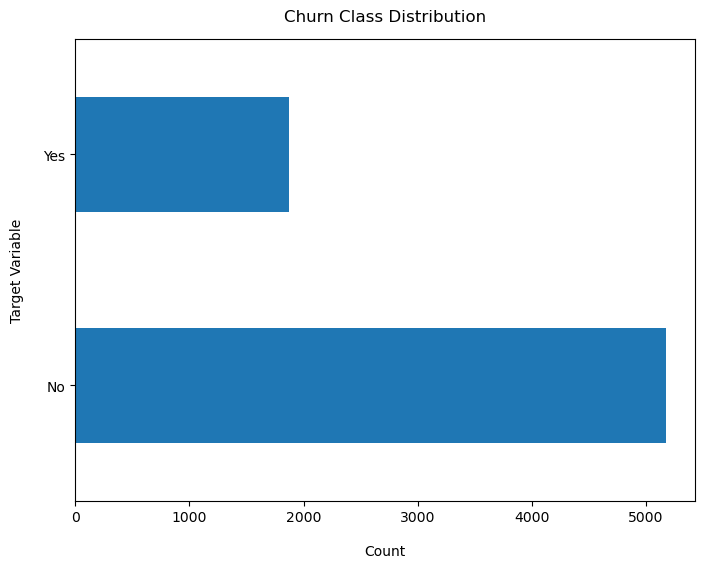

In [8]:
# Distribution of the target variable 'Churn'
df_churn['Churn'].value_counts().plot(kind='barh', figsize=(8, 6))
plt.xlabel("Count", labelpad=14)
plt.ylabel("Target Variable", labelpad=14)
plt.title("Churn Class Distribution", y=1.02)
plt.show()


In [9]:
# Percentage distribution of churn classes
100 * df_churn['Churn'].value_counts() / len(df_churn['Churn'])


Churn
No     73.463013
Yes    26.536987
Name: count, dtype: float64

In [10]:
# Absolute counts of churn classes
df_churn['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

Observations:



*   The dataset is imbalanced, with the churn ratio approximately 73:27.
*   To gain better insights, it is important to analyze the target variable in combination with other features.

In [11]:
# Concise overview of the dataframe
# verbose=True ensures full column-level information is displayed
df_churn.info(verbose=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


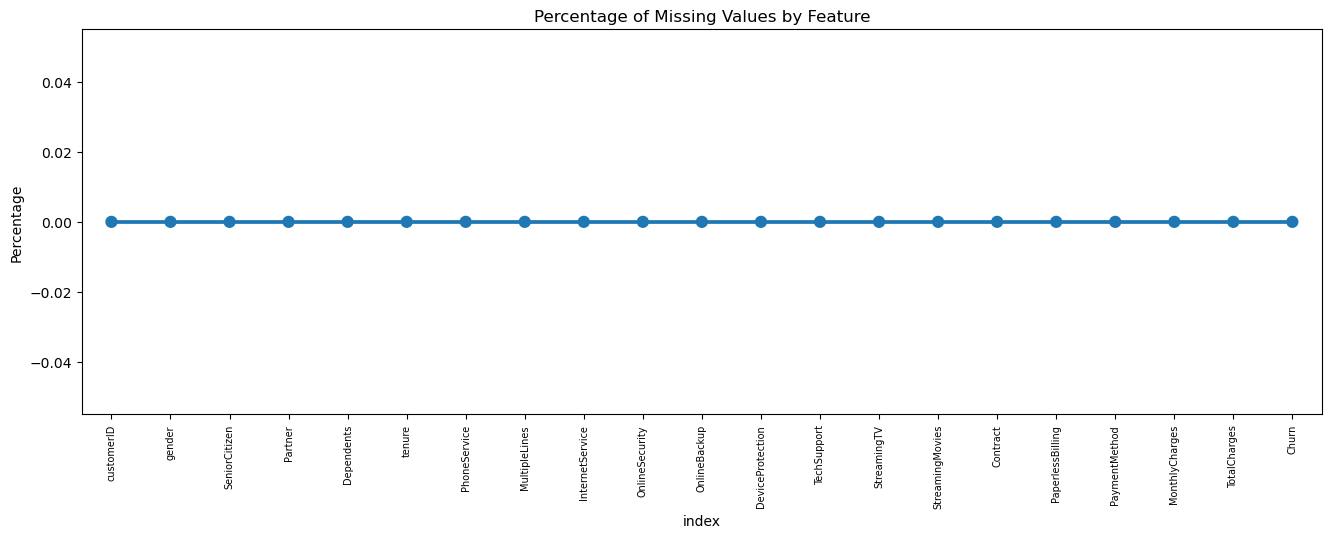

In [12]:
# Percentage of missing values in each column
missing = pd.DataFrame((df_churn.isnull().sum()) * 100 / df_churn.shape[0]).reset_index()

plt.figure(figsize=(16, 5))
ax = sns.pointplot(x='index', y=0, data=missing)
plt.xticks(rotation=90, fontsize=7)
plt.title("Percentage of Missing Values by Feature")
plt.ylabel("Percentage")
plt.show()


## Missing Data – Initial Intuition

* This dataset does not contain any significant missing values.  

**General Guidelines:**  
* For features with only a few missing values, imputation techniques such as regression models or filling with the mean/median may be applied, depending on the feature type.  
* For features with a large proportion of missing values, it is often better to drop those columns as they provide little analytical value.  
* As a rule of thumb, columns with more than 30–40% missing data may be candidates for removal.  
  - However, decisions should be context-driven. For instance, features like `Is_Car` and `Car_Type` may appear to have missing values (NaN) for individuals without a car. In such cases, the missingness itself carries information, and the column should not be discarded.  


## Data Cleaning



 1. Create a working copy of the dataset for manipulation and processing

In [13]:
df_clean = df_churn.copy()

2. Ensure 'TotalCharges' is treated as numeric



In [14]:
df_clean['TotalCharges'] = pd.to_numeric(df_clean['TotalCharges'], errors='coerce')
df_clean.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

3. Inspect records with missing values in 'TotalCharges'

In [15]:
df_clean.loc[df_clean['TotalCharges'].isnull() == True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


Handling Missing Values**  

The column `TotalCharges` contains 11 missing values, representing only 0.15% of the dataset. Given the very small proportion, these rows can be safely excluded from further analysis.  

In [16]:
# Remove rows with missing values
df_clean.dropna(how="any", inplace=True)

# Alternative option (not used here): df_clean.fillna(0)


5. Categorize customers into tenure groups (e.g., 1–12 months, 13–24 months, etc.)

In [17]:
# Maximum tenure
print(df_clean['tenure'].max())  # Output: 72

72


In [18]:
# Define bins of 12 months
labels = ["{0} - {1}".format(i, i + 11) for i in range(1, 72, 12)]
df_clean['tenure_group'] = pd.cut(df_clean['tenure'], range(1, 80, 12), right=False, labels=labels)

In [19]:
# Distribution of tenure groups
df_clean['tenure_group'].value_counts()

tenure_group
1 - 12     2175
61 - 72    1407
13 - 24    1024
25 - 36     832
49 - 60     832
37 - 48     762
Name: count, dtype: int64

**6. Remove unnecessary columns before further processing**


In [20]:
# Drop irrelevant columns: 'customerID' and 'tenure'
df_clean.drop(columns=['customerID', 'tenure'], axis=1, inplace=True)
df_clean.head()


,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12


## Data Exploration

### 1. Distribution of individual predictors by churn


## # Univariate analysis of predictors with respect to the target variable 'Churn'




d:\Anaconda\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
d:\Anaconda\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


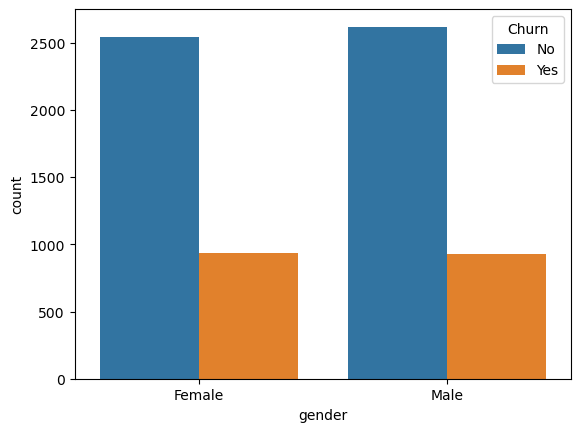

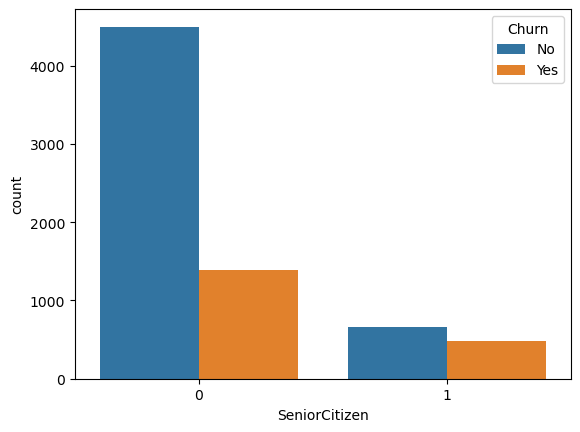

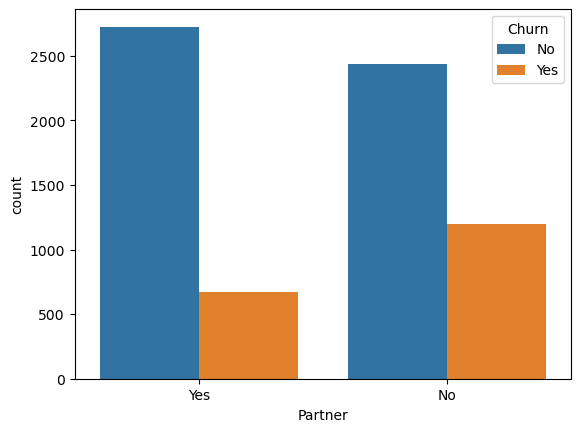

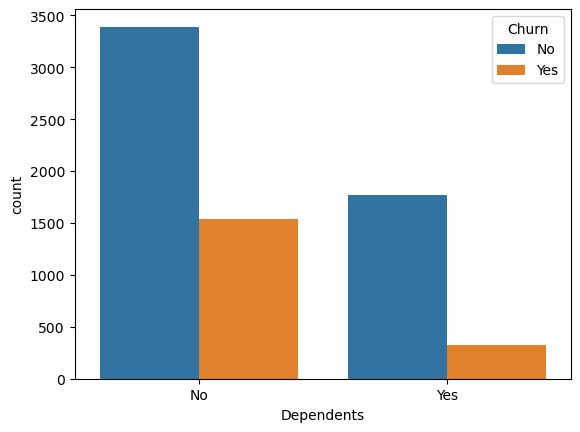

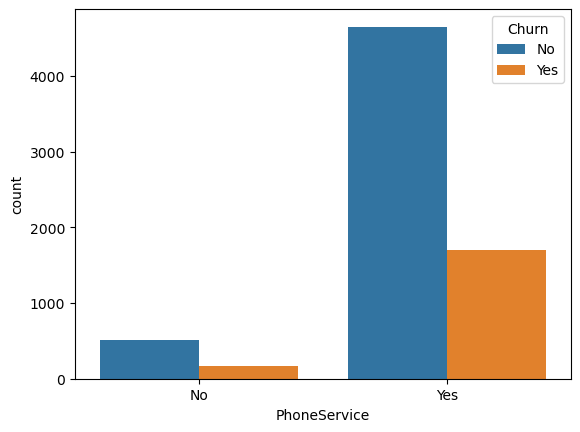

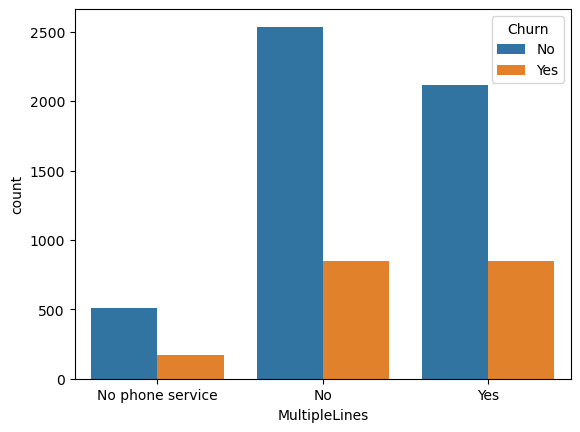

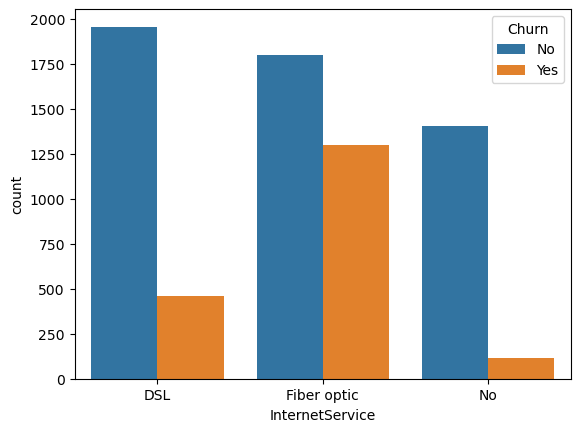

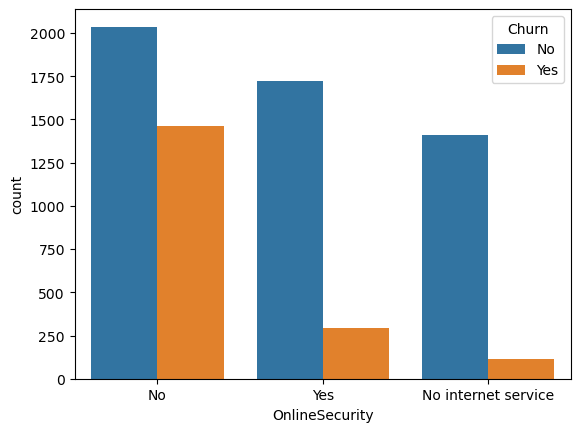

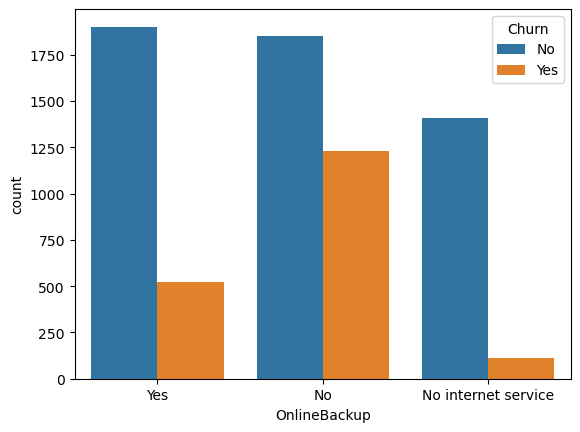

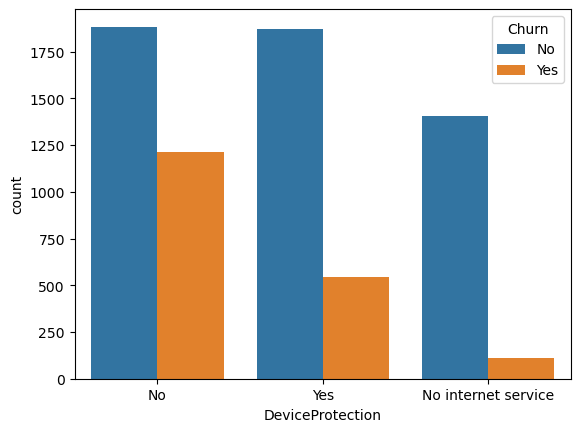

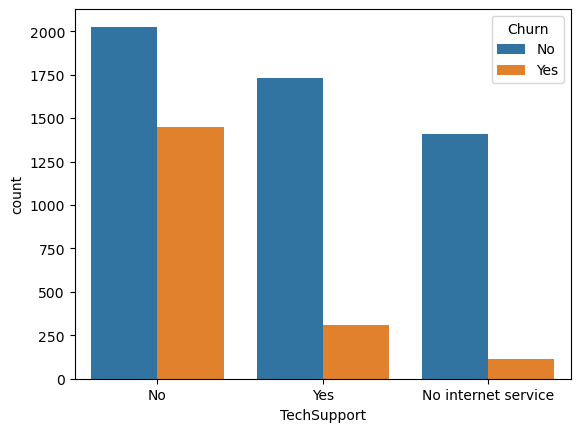

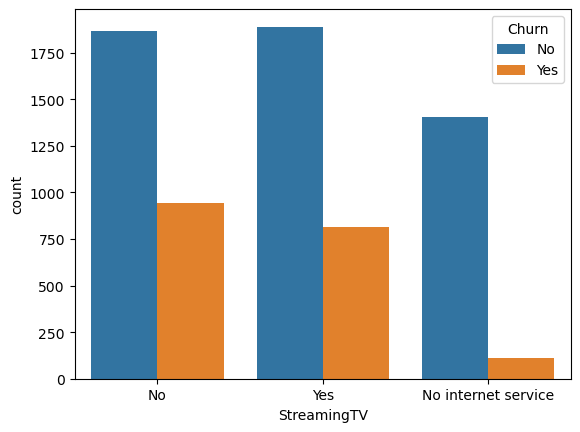

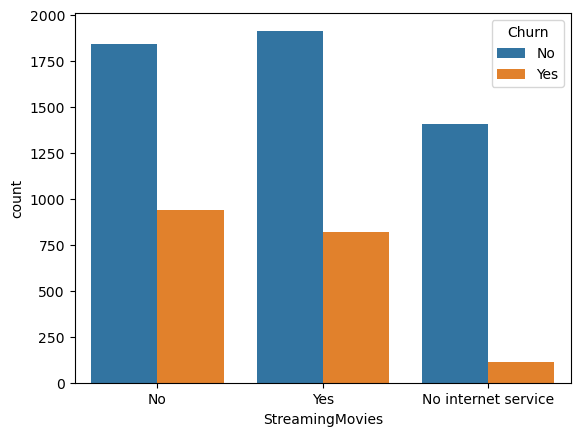

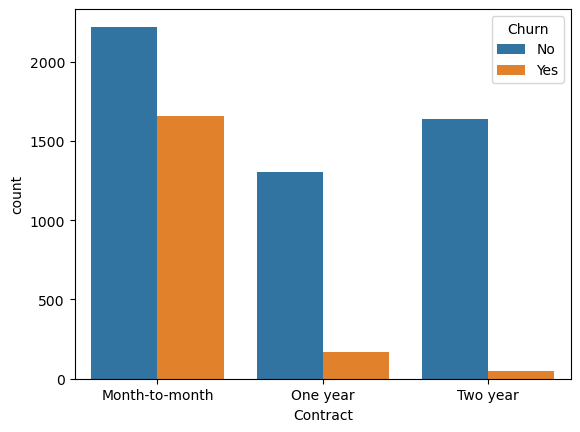

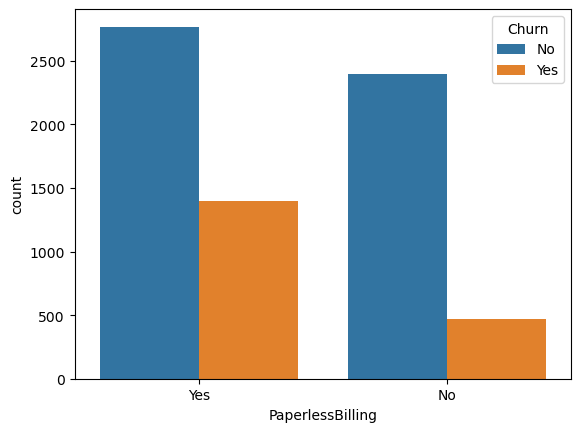

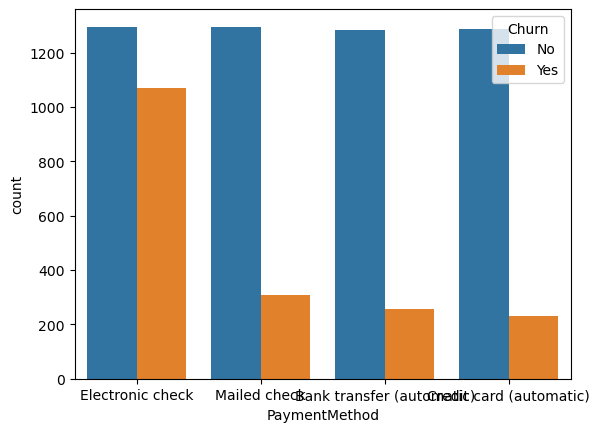

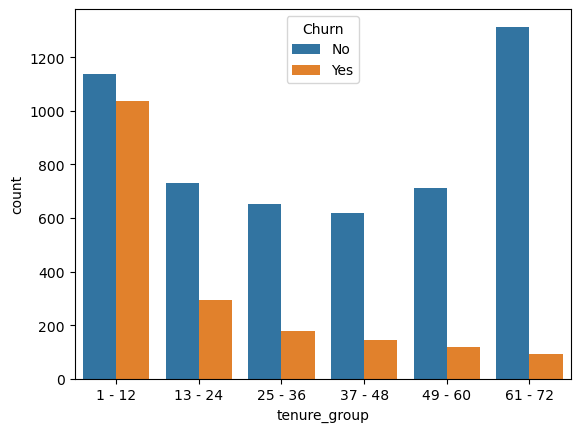

In [21]:
for i, predictor in enumerate(df_clean.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges'])):
    plt.figure(i)
    sns.countplot(data=df_clean, x=predictor, hue='Churn')

**2.** Convert the target variable 'Churn' into a binary numeric variable  
Yes = 1, No = 0*


In [22]:
df_clean['Churn'] = np.where(df_clean['Churn'] == 'Yes', 1, 0)



In [23]:
df_clean.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1 - 12


**3.** Convert all categorical variables into dummy variables


In [24]:
df_dummies = pd.get_dummies(df_clean)
df_dummies.head()


,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,0,True,False,False,True,True,False,...,False,False,True,False,True,False,False,False,False,False
1,0,56.95,1889.50,0,False,True,True,False,True,False,...,False,False,False,True,False,False,True,False,False,False
2,0,53.85,108.15,1,False,True,True,False,True,False,...,False,False,False,True,True,False,False,False,False,False
3,0,42.30,1840.75,0,False,True,True,False,True,False,...,True,False,False,False,False,False,False,True,False,False
4,0,70.70,151.65,1,True,False,True,False,True,False,...,False,False,True,False,True,False,False,False,False,False


**9.** Relationship between Monthly Charges and Total Charges

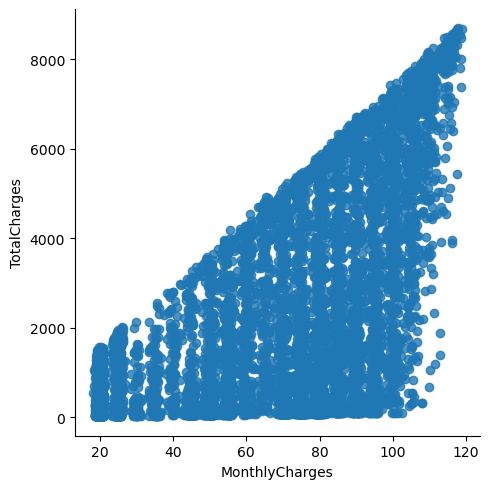

In [25]:
sns.lmplot(data=df_dummies, x='MonthlyCharges', y='TotalCharges', fit_reg=False)


Total Charges increase as MonthlyCharges increase - as expected.




The average MonthlyCharges is USD 64.76; the 75th percentile indicates that 25% of customers pay more than USD 89.85 per month.

**10.** Churn by MonthlyCharges and TotalCharges  

In [ ]:
Mth = sns.kdeplot(df_dummies['MonthlyCharges'][df_dummies["Churn"] == 0],
                  color="Red", shade=True)

Mth = sns.kdeplot(df_dummies['MonthlyCharges'][df_dummies["Churn"] == 1],
                  ax=Mth, color="Blue", shade=True)

Mth.legend(["No Churn", "Churn"], loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Monthly Charges')
Mth.set_title('Monthly Charges Distribution by Churn')


**Insight:**   
Churn rates are higher among customers with **higher MonthlyCharges**.  


In [ ]:
# Distribution of TotalCharges by churn status
Tot = sns.kdeplot(df_dummies['TotalCharges'][df_dummies["Churn"] == 0],
                  color="Red", shade=True)

Tot = sns.kdeplot(df_dummies['TotalCharges'][df_dummies["Churn"] == 1],
                  ax=Tot, color="Blue", shade=True)

Tot.legend(["No Churn", "Churn"], loc='upper right')
Tot.set_ylabel('Density')
Tot.set_xlabel('Total Charges')
Tot.set_title('Total Charges Distribution by Churn')


**Surprising Observation:**  
Churn is relatively **higher at lower TotalCharges**.  

However, when considering **Tenure**, **MonthlyCharges**, and **TotalCharges** together, the picture becomes clearer:  
- Higher MonthlyCharges combined with lower tenure naturally result in lower accumulated TotalCharges.  
- These three factors—**higher MonthlyCharges**, **shorter tenure**, and **lower TotalCharges**—are strongly linked with higher churn.  


**11.Correlation of Predictors with Churn**

<Axes: >

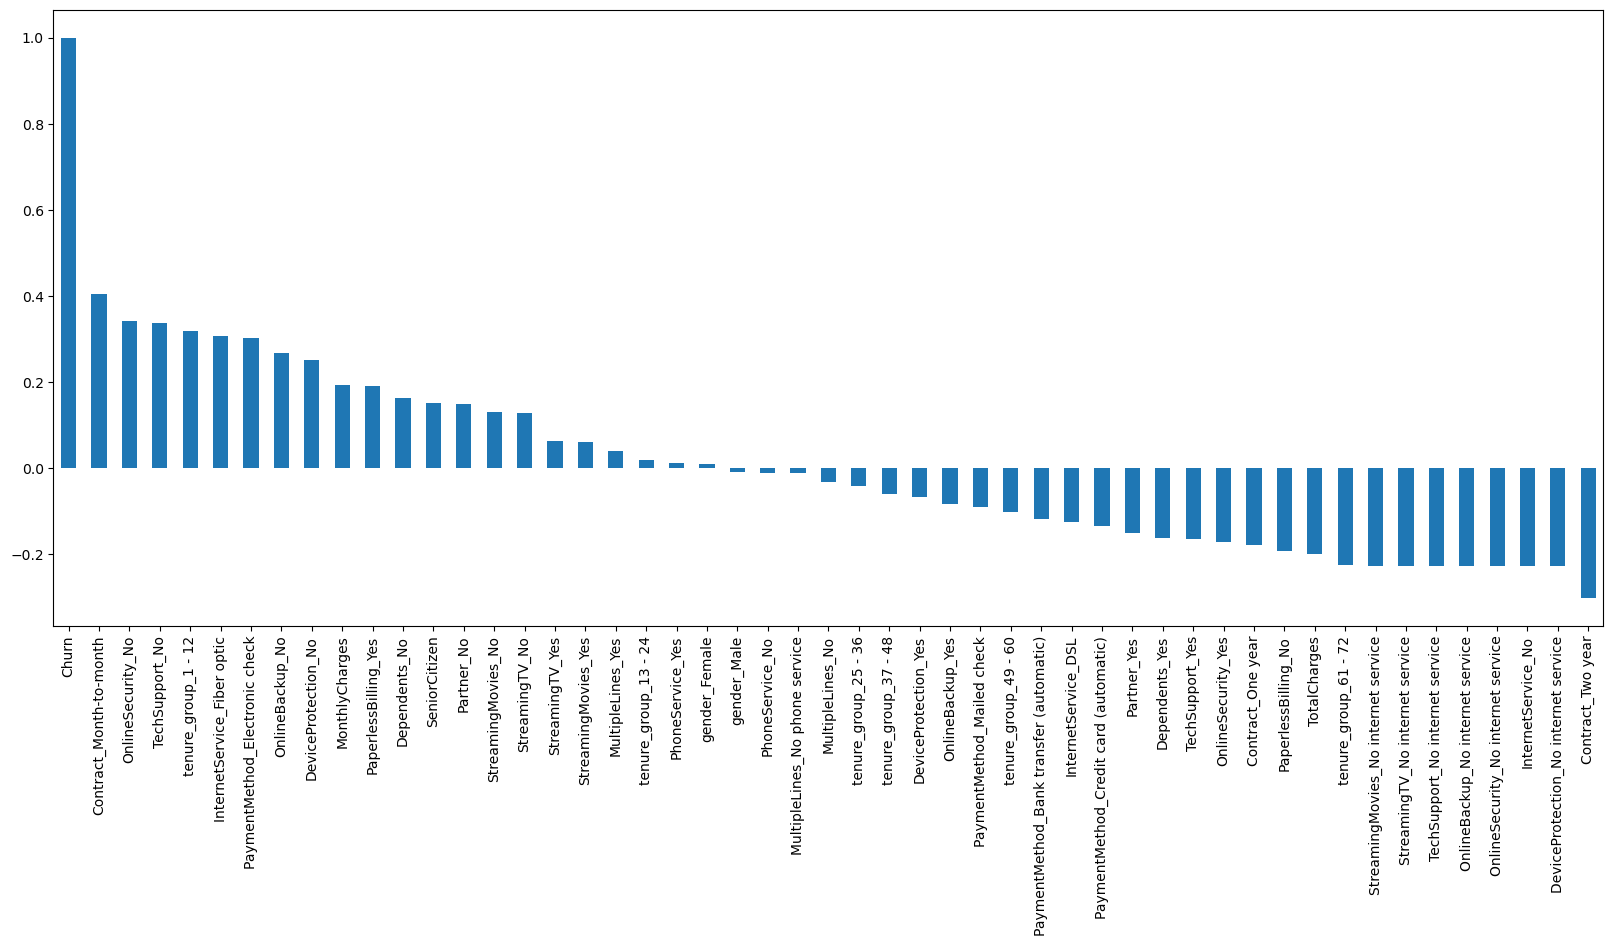

In [28]:
plt.figure(figsize=(20, 8))
df_dummies.corr()['Churn'].sort_values(ascending=False).plot(kind='bar')


**Derived Insights:**  
- **High Churn** is associated with:  
  * Month-to-month contracts  
  * Lack of online security  
  * Lack of technical support  
  * First year of subscription  
  * Fiber optic internet connections  

- **Low Churn** is observed in:  
  * Long-term contracts  
  * Customers without internet service  
  * Customers engaged for 5+ years  

- Minimal impact on churn from:  
  * Gender  
  * Availability of phone service  
  * Number of multiple lines  

These findings are further supported by the correlation **heatmap** below.  


<Axes: >

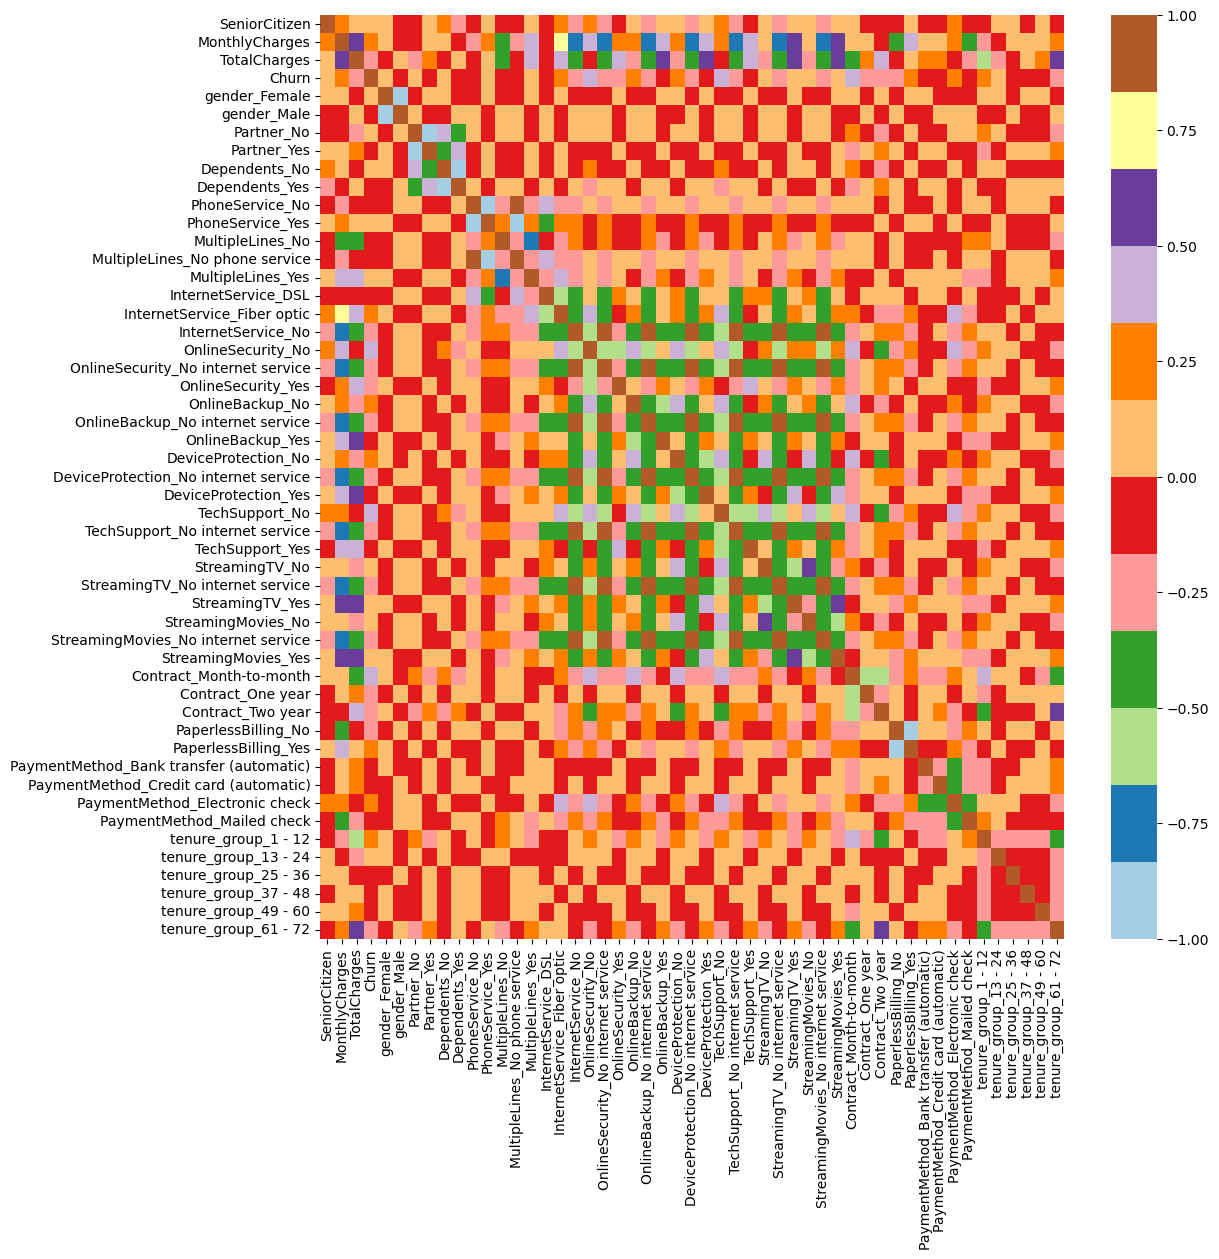

In [29]:
plt.figure(figsize=(12, 12))
sns.heatmap(df_dummies.corr(), cmap="Paired")


## # Bivariate Analysis

In [30]:
# Split dataset into churned and non-churned groups
df_target0 = df_clean.loc[df_clean["Churn"] == 0]
df_target1 = df_clean.loc[df_clean["Churn"] == 1]

In [31]:
def uniplot(df, col, title, hue=None, log_scale=False):
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30

    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + (4 if hue else 0)
    fig.set_size_inches(width, 8)

    plt.xticks(rotation=45)
    if log_scale:
        plt.yscale('log')   # only apply if explicitly asked
    plt.title(title)

    sns.countplot(data=df, x=col, order=df[col].value_counts().index, hue=hue, palette='bright')
    plt.show()


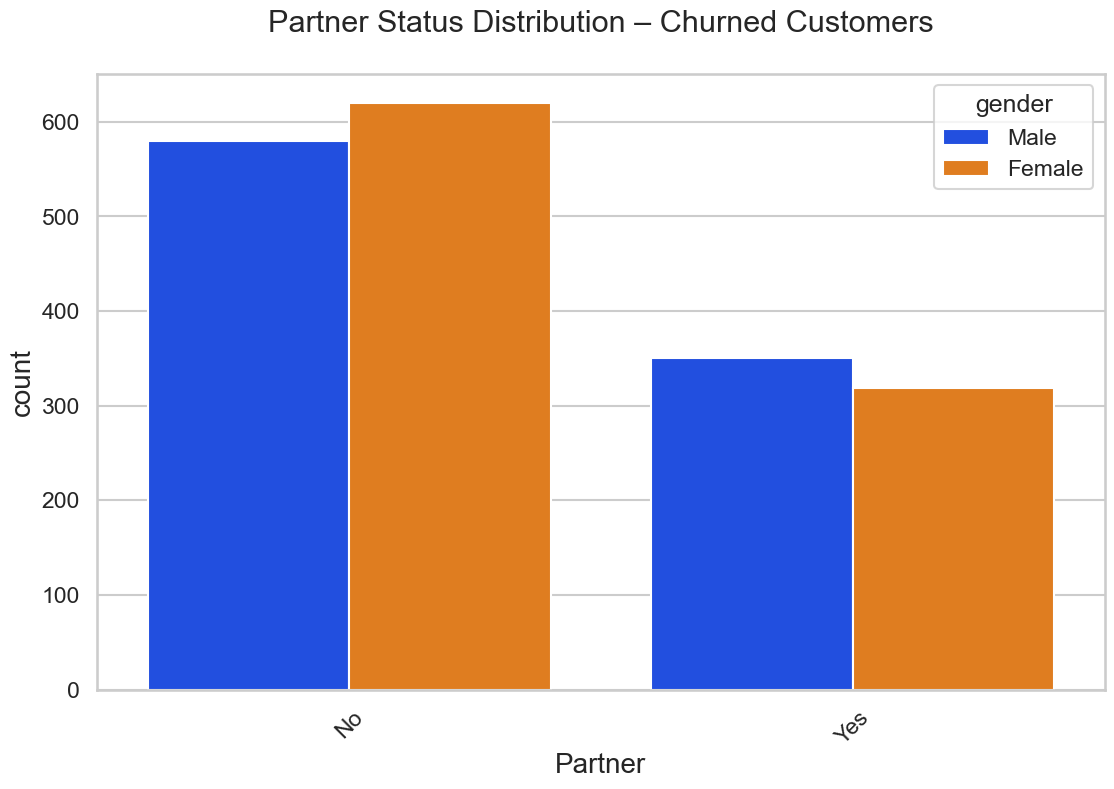

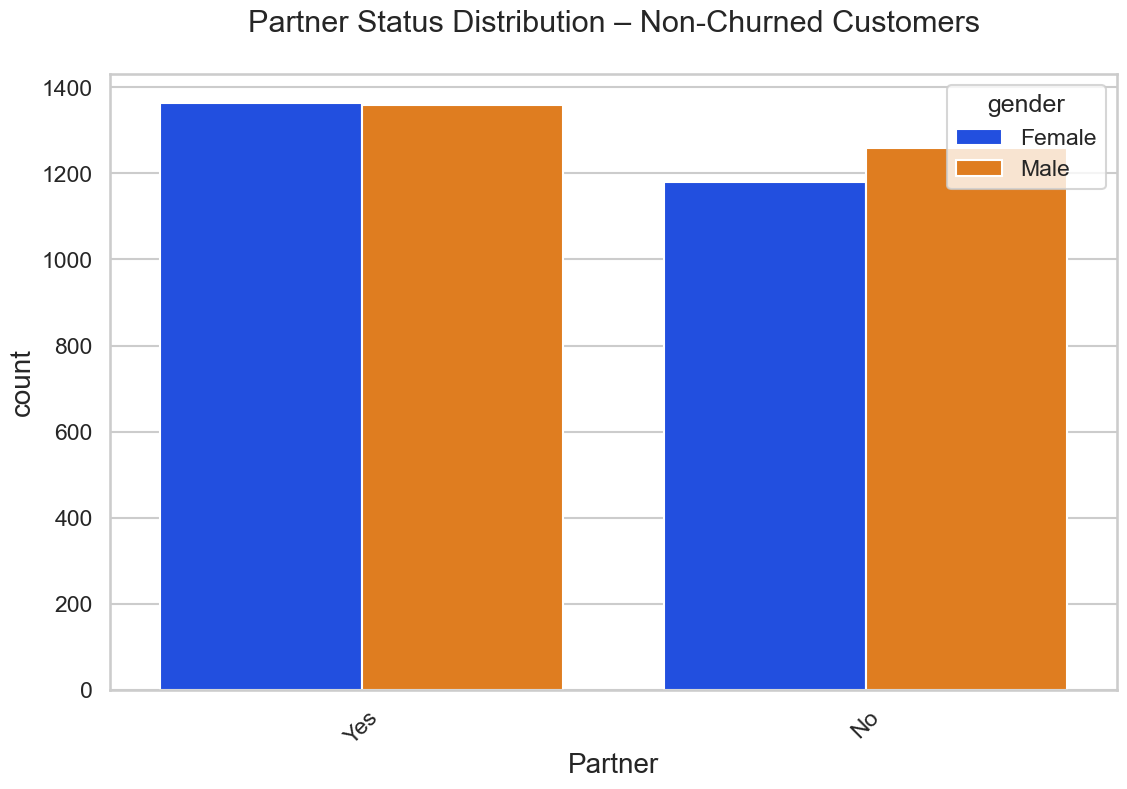

In [32]:
# Distribution of partner status among churned and non-churned customers
uniplot(df_target1, col='Partner', title='Partner Status Distribution – Churned Customers', hue='gender')
uniplot(df_target0, col='Partner', title='Partner Status Distribution – Non-Churned Customers', hue='gender')


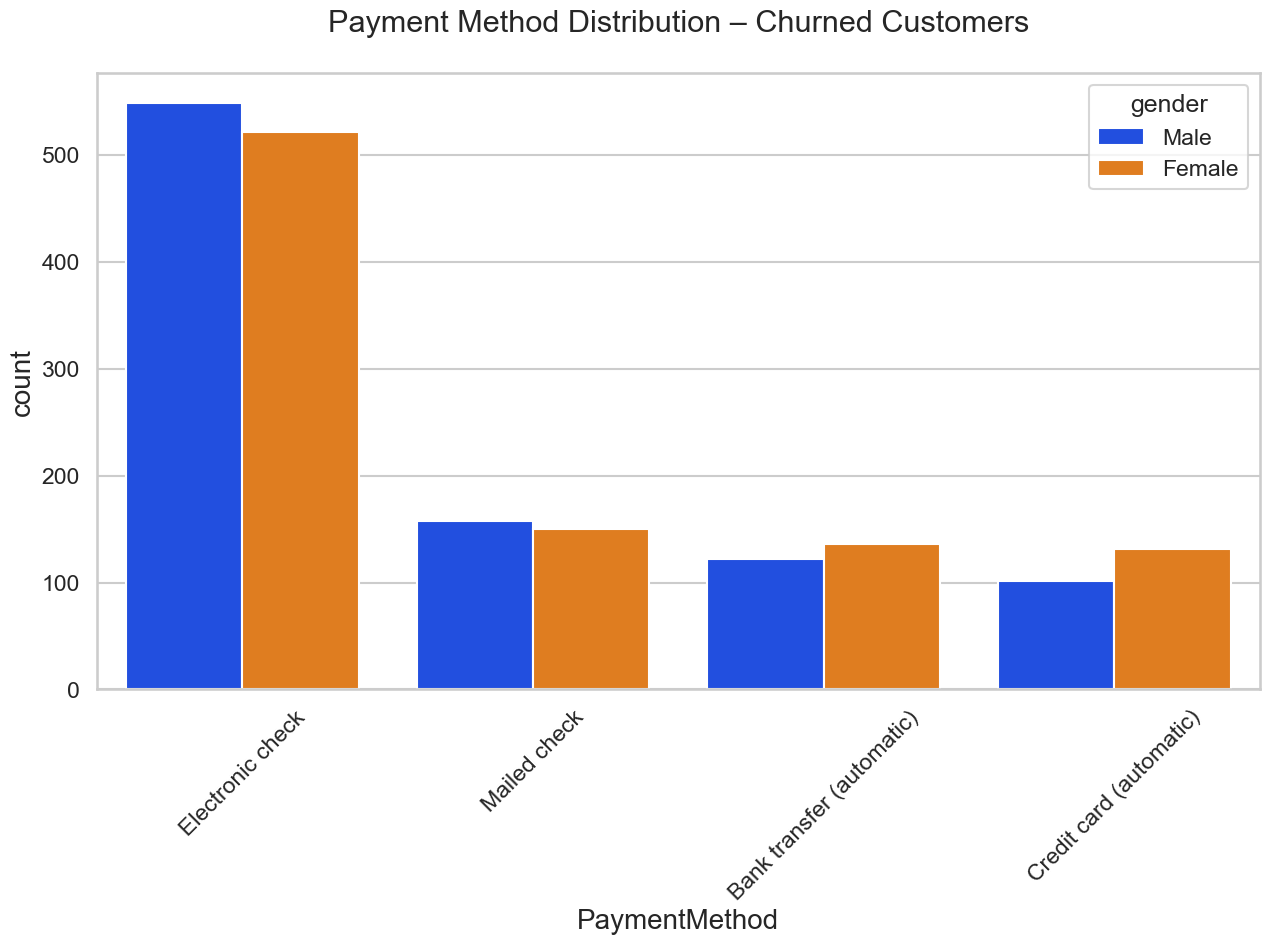

In [33]:
# Distribution of payment method for churned customers
uniplot(df_target1, col='PaymentMethod', title='Payment Method Distribution – Churned Customers', hue='gender')


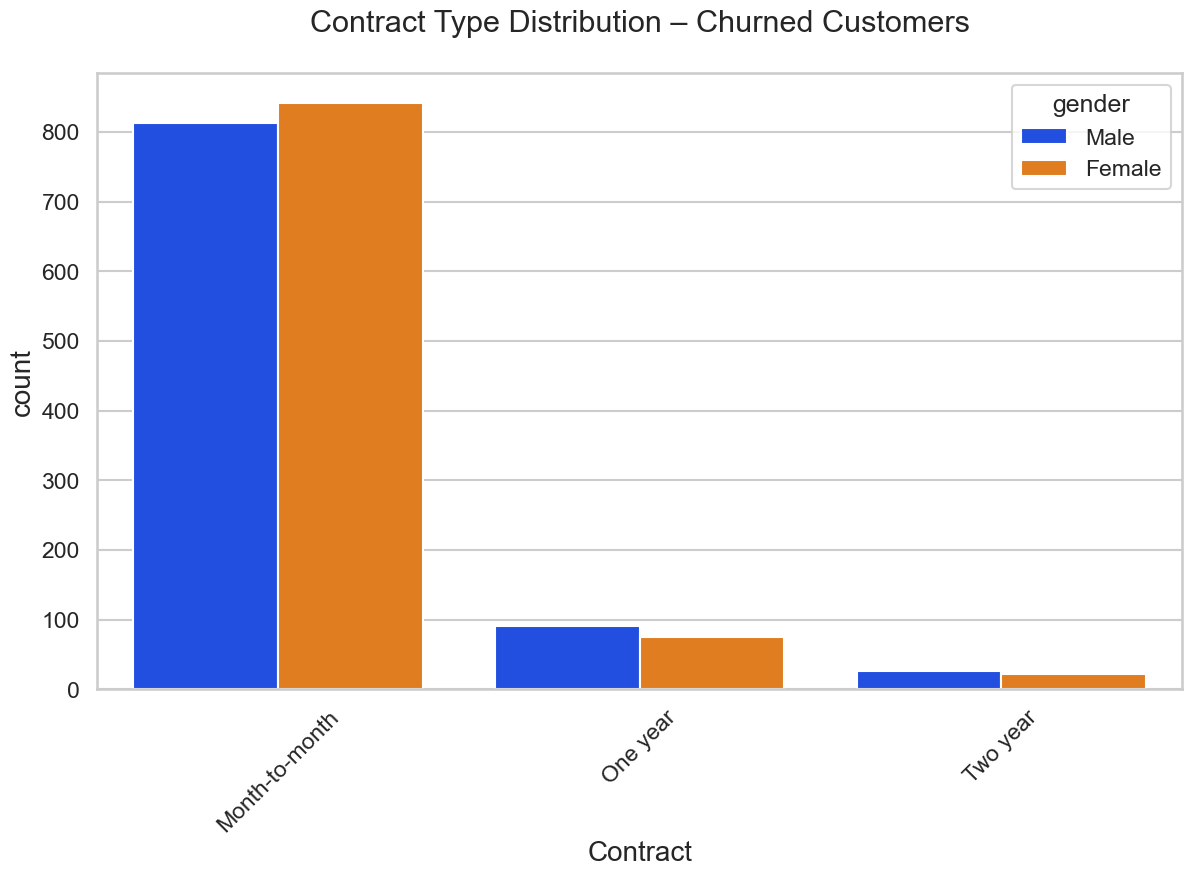

In [34]:
# Distribution of contract type for churned customers
uniplot(df_target1, col='Contract', title='Contract Type Distribution – Churned Customers', hue='gender')

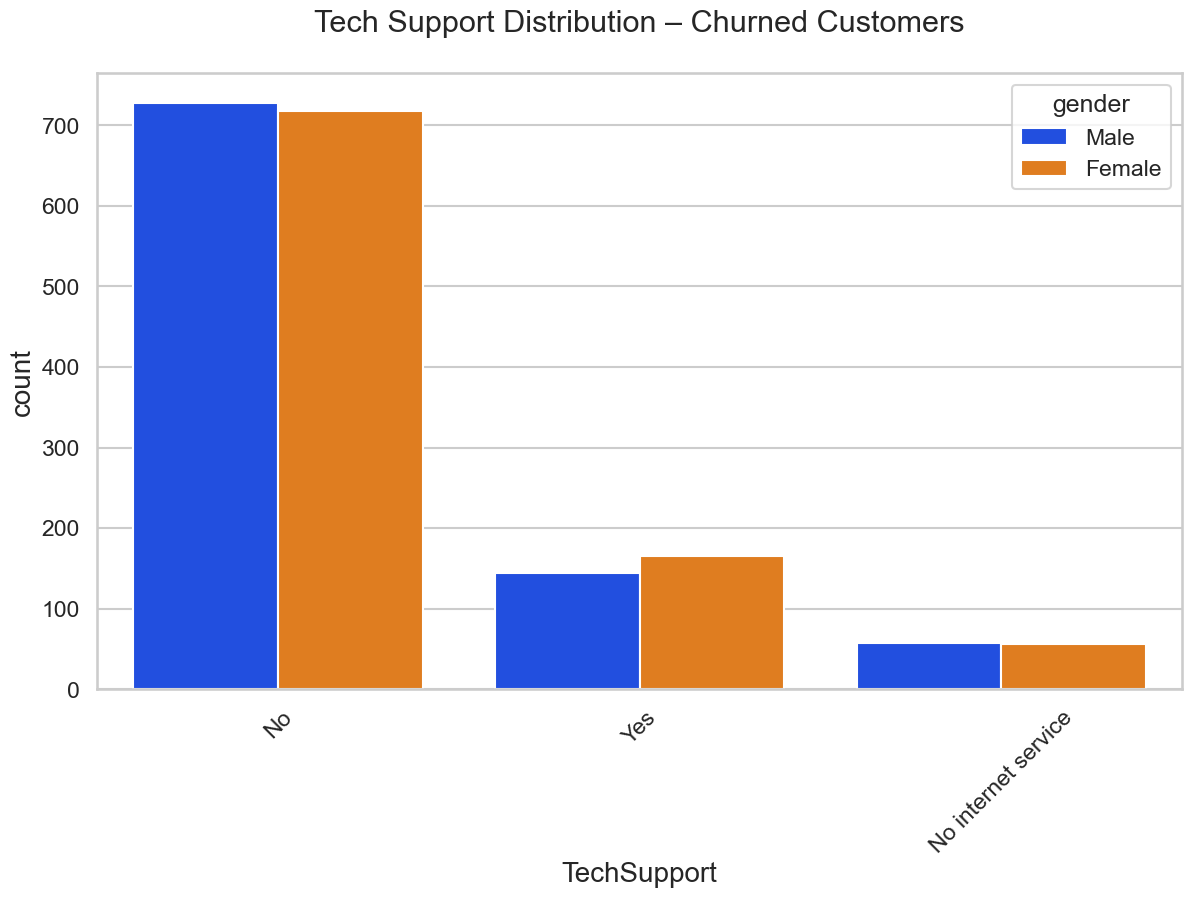

In [35]:
# Distribution of technical support for churned customers
uniplot(df_target1, col='TechSupport', title='Tech Support Distribution – Churned Customers', hue='gender')

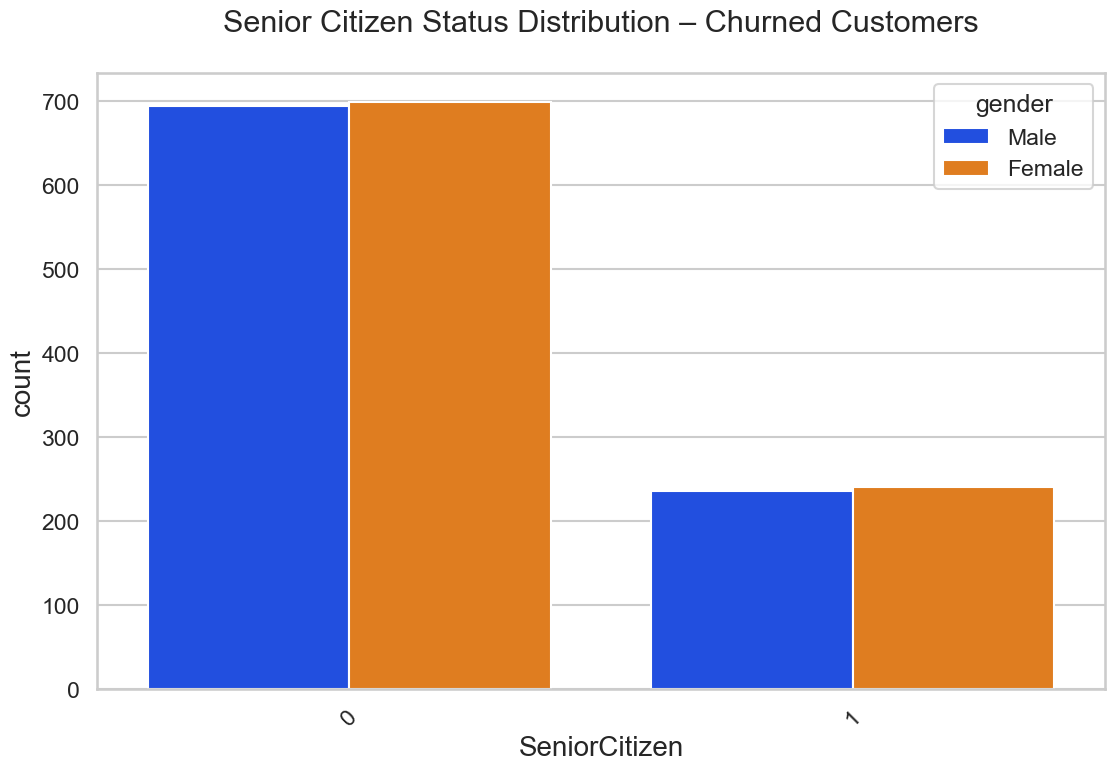

In [36]:
# Distribution of senior citizen status for churned customers
uniplot(df_target1, col='SeniorCitizen', title='Senior Citizen Status Distribution – Churned Customers', hue='gender')

# CONCLUSION

### Quick Insights from the Analysis

1. Customers paying via **Electronic check** show the highest churn rates.  
2. **Month-to-month contract** customers are more likely to churn, likely because of the absence of long-term commitment.  
3. Customers with **no online security** or **no technical support** tend to churn at higher rates.  
4. **Non-senior citizens** exhibit higher churn compared to senior citizens.  

**Note:** These are only a few high-level observations. A deeper exploration may reveal additional insights worth investigating.  


In [37]:
df_dummies.to_csv("customer_churn_processed.csv", index=False)
